# Overview
Incident Management and Response is a key component of any IT Service Management Strategy. These are the typical steps involved in the Incident Management Process:
- Receipt of the issue 
- Create a ticket
- Review of the ticket by L1/L2 teams
- Attempt to resolve the ticket using Standard Operating Procedures by L1/L2
- If needed, transfer the ticket to the appropriate L3 team for further review and resolving.


# Current ‘Pain’ Points
Currently the organization sees these issues in the Incident Ticket Management Process:
The process is largely ‘manual’. L1/L2 teams need to spend time to review Standard Operating Procedures (SOPs) before assigning to functional teams. Minimum 25-30% incidents needs to be reviewed for SOPs before ticket assignment. 

- Minimum 1 FTE effort needed only for incident assignment to L3 teams

- Human error - many times the incident gets assigned to the wrong L3 team. So additional effort needed to reassign to the correct team after re-review of the ticket, this not only increases the manual effort needed BUT also leads to customer dis-satisfaction because the customer who opened the ticket is left frustrated because the ticket is in limbo being tossed between various teams before getting to the actual team who can help resolve the issued.
 

# Objective of this Project
Create various Machine Learning Models that can help classify incidents and assign them to the right Functional Group. Our objective is to create NLP models that can predict with at least 85% accuracy.





In [1]:
#!pip install wordcloud
#!pip install langdetect
#!pip install googletrans
#!pip install textblob
#!pip install spacy
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg
#!pip install -U spacy-lookups-data
#!pip install langid
#!pip install google_trans_new
#!pip uninstall googletrans
#!pip install autocorrect
#!pip install ftfy
#!pip install seaborn
#!pip install nltk
#!pip install bs4
#!pip install xgboost
#!pip install nbconvert[webpdf]

In [2]:
import itertools
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS 
#from langdetect import detect
from itertools import cycle
#import googletrans
#from googletrans import Translator
from google_trans_new import google_translator 
from multiprocessing.dummy import Pool as ThreadPool
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
from sklearn import preprocessing
#from textblob import TextBlob
#from textblob.translate import NotTranslated
import random
import operator
import math
import tqdm
import time
#import spacy
import json
#import langid
from bs4 import BeautifulSoup
from string import digits

from autocorrect import Speller
from ftfy import fix_encoding, fix_text, fix_text_segment, badness


### This section below contains  Useful Functions 
- As we find new functions, we will create them here.

In [3]:
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"didnt": "did not",
"doesnt": "does not",
"thats": "that is",
"wasnt": "was not",
"weren": "were not",
"theyre": "there",
"dont": "do not",
"cant": "cannot",
"arent": "are not",
"whats": "what is",
"you've": "you have"
}
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [4]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def fn_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

def preprocess(dataset, columnsToPreprocess, regexList):
    for column in columnsToPreprocess:
        #for regex in regexList:
            #dataset[column] = removeString(dataset[column], regex)
            dataset[column] = dataset[column].apply(clean_step2)
    return dataset

def clean_step2(text):
#1)remove html tags    
   soup=BeautifulSoup(text,"html.parser")
   text=soup.get_text(separator="")
    
#2) Remove non-ASCII characters
   encoded_string = text.encode("ascii", "ignore")
   text= encoded_string.decode()
   
#3)lower case    
   text=text.lower()
   text = ' '.join([w for w in text.split()])

#4)remove punctuation       
   text = re.sub(r'[^\w\s]', '',text) 
   
#5)remove whitespaces
   text=" ".join(text.split())
 
#6)remove  digits  
   remove_digits = str.maketrans('', '', digits) 
   text = text.translate(remove_digits) 
    
#7)remove emails   
   text = re.sub(r'\S*@\S*\s?', '', text)
   
#8)remove hyperlinks
   text = re.sub(r'https?:\/\/.*\/\w*','', text)
   
#9)remove other characters   
   text=text.replace("_"," ")
  
   text=text.replace("\\"," ")
   return text   

def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList


def lemmatize(stringlist):
    processed_all_documents = list()

    for desc in stringlist:
        word_tokens = word_tokenize(desc) 
    
        filtered_sentence = [] 

        # Removing Stopwords
        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
    
        # Lemmetization
        lemma_word = []
        wordnet_lemmatizer = WordNetLemmatizer()
        for w in filtered_sentence:
            word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
            word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
            word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
            lemma_word.append(word3)
        words = ' '.join(lemma_word)
        processed_all_documents.append(words) 
    return processed_all_documents


# Write a function to apply to the dataset to detect garbage data
def detect_garbage(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    


# Milestone 1: Pre-Processing, Data Visualisation and EDA

1. Exploring the given Data files
2. Understanding the structure of data
3. Missing points in data
4. Finding inconsistencies in the data
5. Visualizing different patterns
6. Visualizing different text features
7. Dealing with missing values
8. Text preprocessing
9. Creating word vocabulary from the corpus of report text data
10. Creating tokens as required

This notebook contains the detailed steps on our path to accomplishing the goals set for Milestone 1

# EDA

##### We manually create the csv file from the excel and use pandas to read the csv.
- For some reason when we use the read_excel function, the number of NaN increase to 8 

In [5]:
mydata = pd.read_csv('datasets/input_data.csv')
#mydata = pd.read_excel("datasets/input_data.xlsx")

In [6]:
mydata.head(20)

Short description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr_tool page   
4                                        skype error    
5      unable to log in to engineering tool and skype   
6   event: critical:HostName_221.company.com the v...   
7   ticket_no1550391- employment status - new non-...   
8                unable to disable add ins on outlook   
9                     ticket update on inplant_874773   
10  engineering tool says not connected and unable...   
11            hr_tool site not loading page correctly   
12  unable to login to hr_tool to sgxqsuojr xwbeso...   
13                   user wants to reset the password   
14                           unable to open payslips    
15                    ticket update on inplant_874743   
16                     unable to login to company vpn   
17      when undocking pc , screen will not come back   
18                          erp SID_34 account locked   
19                            unable to sign into vpn   

                                          Description             Caller  \
0   -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1   \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2   \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                       unable to access hr_tool page  xbkucsvz gcpydteq   
4                                        skype error   owlgqjme qhcozdfx   
5      unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6   event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7   ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8                unable to disable add ins on outlook  mdbegvct dbvichlg   
9                     ticket update on inplant_874773  fumkcsji sarmtlhy   
10  engineering tool says not connected and unable...  badgknqs xwelumfz   
11            hr_tool site not loading page correctly  dcqsolkx kmsijcuz   
12  unable to login to hr_tool to sgxqsuojr xwbeso...  oblekmrw qltgvspb   
13                   user wants to reset the password  iftldbmu fujslwby   
14                           unable to open payslips   epwyvjsz najukwho   
15                    ticket update on inplant_874743  fumkcsji sarmtlhy   
16  \n\nreceived from: xyz@company.com\n\nhi,\n\ni...  chobktqj qdamxfuc   
17      when undocking pc , screen will not come back  sigfdwcj reofwzlm   
18                          erp SID_34 account locked  nqdyowsm yqerwtna   
19                            unable to sign into vpn  ftsqkvre bqzrupic   

   Assignment group  
0             GRP_0  
1             GRP_0  
2             GRP_0  
3             GRP_0  
4             GRP_0  
5             GRP_0  
6             GRP_1  
7             GRP_0  
8             GRP_0  
9             GRP_0  
10            GRP_0  
11            GRP_0  
12            GRP_0  
13            GRP_0  
14            GRP_0  
15            GRP_0  
16            GRP_0  
17            GRP_3  
18            GRP_0  
19            GRP_0

In [7]:
mydata.shape

(8500, 4)

###### Observation:
- There are 8500 records in the dataset
- Each Dataset contains 4 columns
- The column 'Caller' seems to contain only junk. We will drop it. 

In [8]:
mydata = mydata.drop('Caller',axis=1)

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8498 non-null   object
 1   Description        8499 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [10]:
# Missing data check #1:
mydata.describe(include='all') 

Short description Description Assignment group
count               8498        8499             8500
unique              7482        7817               74
top       password reset         the            GRP_0
freq                  38          56             3976

### We also notice some records with junks characters in Short Description and Description

In [11]:
mydata['Short description'] = mydata['Short description'].astype(str)
mydata['Description'] = mydata['Description'].astype(str)
mydata['Assignment group'] = mydata['Assignment group'].astype(str)

In [12]:
# Check the dataset for garbage data
mydata[~mydata.iloc[:,:-1].applymap(detect_garbage).all(1)]
mydata['Description'].apply(detect_garbage)

0        True
1        True
2        True
3        True
4        True
        ...  
8495     True
8496     True
8497     True
8498     True
8499    False
Name: Description, Length: 8500, dtype: bool

In [13]:
print(mydata.iloc[7126]['Short description'])
print(mydata.iloc[7969]['Description'])

ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘
å®¢æˆ·æä¾›çš„åœ¨çº¿é€è´§å•ç”Ÿæˆç³»ç»Ÿæ‰“ä¸å¼€ï¼Œéœ€å°½å¿«è§£å†³


In [14]:
# Take an example of row# 7126 Short Desc and fix it
print('Junk text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (mydata['Short description'][7126], 
                                                                        fix_text(mydata['Short description'][7126])))

# List all mojibakes defined in ftfy library
print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Junk text: ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘
Fixed text: 电脑卡且连不上内网

Mojibake Symbol RegEx:
 [ÂÃÎÏÐÑØÙĂĎĐŃŘŮ][-€ƒ‚„†‡ˆ‰‹Œ“•˜œŸ¡¢£¤¥¦§¨ª«¬¯°±²³µ¶·¸¹º¼½¾¿ˇ˘˝]|[ÂÃÎÏÐÑØÙĂĎĐŃŘŮ][›»‘”´©™]\w|×[-ƒ‚„†‡ˆ‰‹Œ“•˜œŸ¡¦§¨ª«¬¯°²³ˇ˘›‘”´©™]|[¬√][ÄÅÇÉÑÖÜáàâäãåçéèêëíìîïñúùûü†¢£§¶ß®©™≠ÆØ¥ªæø≤≥]|\w√[±∂]\w|◊|[ðđ][Ÿ]|â€|вЂ[љћ¦°№™ќ“”]


In [15]:
# Sanitize the dataset from Mojibakes
mydata['Short description'] = mydata['Short description'].apply(fix_text_segment)
mydata['Description'] = mydata['Description'].apply(fix_text)

# Visualize that row# 7126
mydata.iloc[7126,:]

Short description                                            电脑卡且连不上内网
Description          \n\nreceived from: tuqrvowp.fxmzkvqo@gmail.com...
Assignment group                                                GRP_30
Name: 7126, dtype: object

#  Observation
- There seem to a few invalid values in Sort Description & Description.
- On further checking we find that they can be converted to valid non english alphabets using ftfy library

In [16]:
mydata.iloc[1081,:]

Short description                                 用友软件问题
Description          打开已关闭的销售订单时,显示"不能在手动或分布事物方式下创建新的链接"
Assignment group                                  GRP_48
Name: 1081, dtype: object

In [17]:
df = mydata.query('Description == ""')
df

Empty DataFrame
Columns: [Short description, Description, Assignment group]
Index: []

In [18]:
## Missing data check #2 : 
## Are there any null values
mydata.isna().apply(pd.value_counts)
## Short Description contains 2 nulls and Description contains 1 null 

Short description  Description  Assignment group
False               8500         8500              8500

In [19]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [Short description, Description, Assignment group]
Index: []

In [20]:
#This method is useful because it shows count, mean, and standard deviation along with the 5 point summary
mydata.describe().T

count unique             top  freq
Short description  8500   7483  password reset    38
Description        8500   7815             the    56
Assignment group   8500     74           GRP_0  3976

#### Number of classes in the Assignment Group 

In [21]:
len(mydata['Assignment group'].unique())

74

#### Assignment Group Values

In [22]:
mydata['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

###### Assignment Group Distribution

In [23]:
df_assignment_group_dist = mydata['Assignment group'].value_counts().reset_index()
df_assignment_group_dist['percentage'] = (df_assignment_group_dist['Assignment group']/df_assignment_group_dist['Assignment group'].sum())*100
df_assignment_group_dist.head(20)

index  Assignment group  percentage
0    GRP_0              3976   46.776471
1    GRP_8               661    7.776471
2   GRP_24               289    3.400000
3   GRP_12               257    3.023529
4    GRP_9               252    2.964706
5    GRP_2               241    2.835294
6   GRP_19               215    2.529412
7    GRP_3               200    2.352941
8    GRP_6               184    2.164706
9   GRP_13               145    1.705882
10  GRP_10               140    1.647059
11   GRP_5               129    1.517647
12  GRP_14               118    1.388235
13  GRP_25               116    1.364706
14  GRP_33               107    1.258824
15   GRP_4               100    1.176471
16  GRP_29                97    1.141176
17  GRP_18                88    1.035294
18  GRP_16                85    1.000000
19  GRP_17                81    0.952941

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/seaborn/categorical.py:1604: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  barfunc(barpos, self.statistic, self.width,


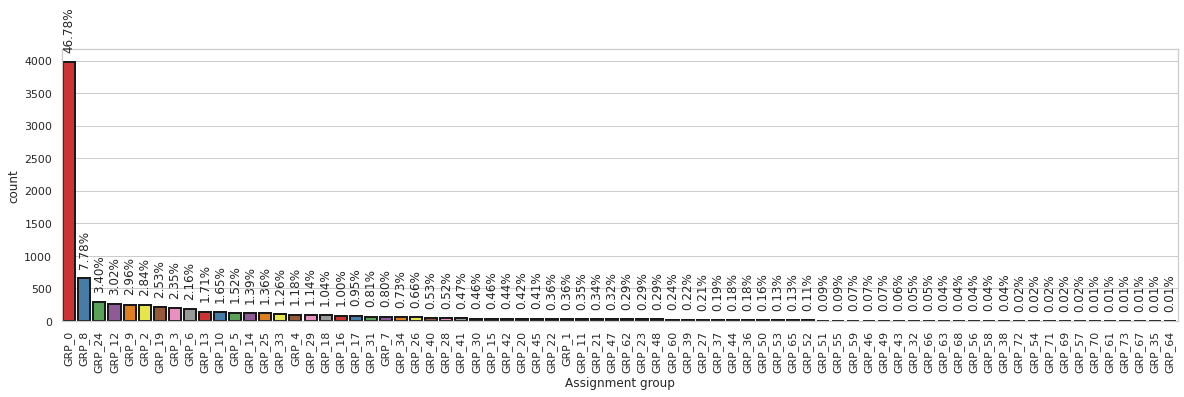

In [24]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
order = mydata["Assignment group"].value_counts().index

ax = sns.countplot(x="Assignment group", data=mydata, order=order, linewidth=2,
                  edgecolor = "k"*len(order), palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(mydata.index)*100, '.2f')+"%"), 
              (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom',
              rotation=90, xytext = (0, 10), textcoords = 'offset points')

# Observation
- Group 0 has the most entries - this is expected because we guess Grp_0 is L1 - so gets the most tickets and also resolves them directly based on SOPs (Standard Operating Procedures)

#### Top 20 Assignment groups with highest number of tickets

In [25]:
df_top_20 = mydata['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

index  Assignment group
0    GRP_0              3976
1    GRP_8               661
2   GRP_24               289
3   GRP_12               257
4    GRP_9               252
5    GRP_2               241
6   GRP_19               215
7    GRP_3               200
8    GRP_6               184
9   GRP_13               145
10  GRP_10               140
11   GRP_5               129
12  GRP_14               118
13  GRP_25               116
14  GRP_33               107
15   GRP_4               100
16  GRP_29                97
17  GRP_18                88
18  GRP_16                85
19  GRP_17                81

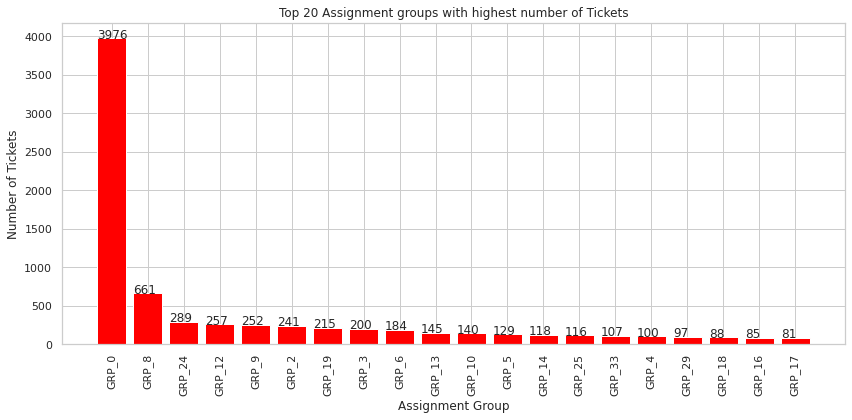

In [26]:
colors = ['red', 'blue', 'green']
i = -1
def getCycledColor():
    global i, colors
    if i < len(colors) -1:
        i = i + 1
        return colors[i]
    else:
        i = -1
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'], facecolor=getCycledColor())
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### Bottom 20 Assignment groups with least number of tickets

In [27]:
df_bottom_20 = mydata['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

index  Assignment group
0   GRP_70                 1
1   GRP_61                 1
2   GRP_73                 1
3   GRP_67                 1
4   GRP_35                 1
5   GRP_64                 1
6   GRP_72                 2
7   GRP_54                 2
8   GRP_71                 2
9   GRP_69                 2
10  GRP_57                 2
11  GRP_63                 3
12  GRP_68                 3
13  GRP_56                 3
14  GRP_58                 3
15  GRP_38                 3
16  GRP_32                 4
17  GRP_66                 4
18  GRP_43                 5
19  GRP_59                 6

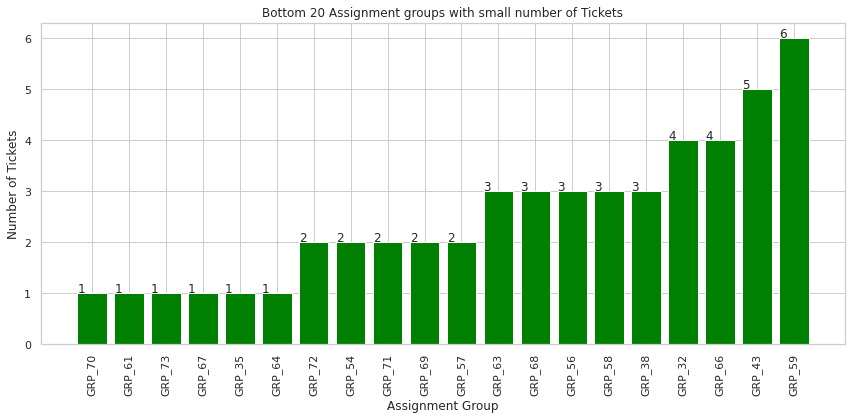

In [28]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'], color='green')
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### Distribution of tickets counts in various bins

In [29]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_assignment_group_dist[df_assignment_group_dist['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 1)& (df_assignment_group_dist['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 5)& (df_assignment_group_dist['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 10)& (df_assignment_group_dist['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 20)& (df_assignment_group_dist['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 50)& (df_assignment_group_dist['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 100)])}
#append row to the dataframe
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

Description Ticket Count
0        1 ticket            6
1      2-5 ticket           13
2     6-10 ticket            6
3    11-20 ticket            9
4    21-50 ticket           16
5   51-100 ticket            9
6     >100 ticket           15

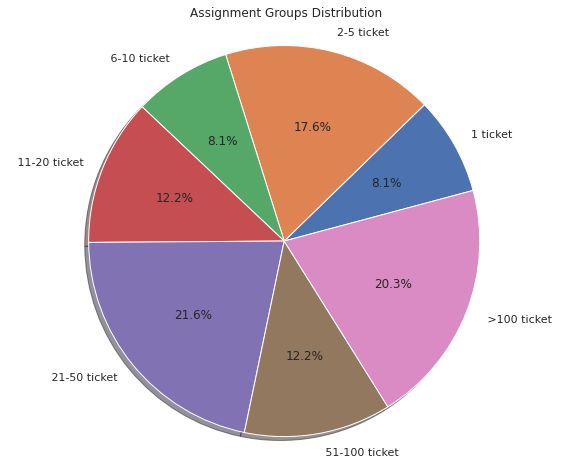

In [30]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

# Fetch wordcount for each Ticket in its raw state 
- (so far we have handled only junk characters and replaced any Nans with empty strings)
- We will merge the Short and Description fields just to perform EDA on the tickets. We will redo this (merge step) later after translation

In [31]:
#merging  the 2 preprocessed columns to a single column without duplicate words
mydata['Raw Combined description'] = mydata['Short description'] .map(str) + ' ' +  mydata['Description'].map(str)    
mydata['Raw Combined description'] = mydata['Raw Combined description'].apply(lambda x: ' '.join(pd.unique(x.split()))) 

mydata['raw_word_count'] = mydata['Raw Combined description'].apply(lambda x: len(str(x).split(" ")))
mydata[['Raw Combined description','raw_word_count']].head()

Raw Combined description  raw_word_count
0  login issue -verified user details.(employee# ...              28
1  outlook received from: hmjdrvpb.komuaywn@gmail...              24
2  cant log in to vpn received from: eylqgodm.ybq...              13
3                      unable to access hr_tool page               5
4                                        skype error               2

In [32]:
df = mydata.query('Description == ""')
df

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count]
Index: []

In [33]:
#Identify common words
freq = pd.Series(' '.join(mydata['Raw Combined description']).split()).value_counts()[:20]
freq

to                             3316
in                             2642
the                            2555
from:                          2445
received                       2329
is                             1937
not                            1688
on                             1592
and                            1545
please                         1524
for                            1482
i                              1261
a                              1164
of                             1052
it                             1017
job                             997
erp                             969
monitoring_tool@company.com     961
password                        937
unable                          870
dtype: int64

# We now will list the most common words used - in this round will NOT remove any stop words - we will do that later and repeat this step 

[Text(0, 0, 'to'),
 Text(1, 0, 'in'),
 Text(2, 0, 'the'),
 Text(3, 0, 'from:'),
 Text(4, 0, 'received'),
 Text(5, 0, 'is'),
 Text(6, 0, 'not'),
 Text(7, 0, 'on'),
 Text(8, 0, 'and'),
 Text(9, 0, 'please'),
 Text(10, 0, 'for'),
 Text(11, 0, 'i'),
 Text(12, 0, 'a'),
 Text(13, 0, 'of'),
 Text(14, 0, 'it'),
 Text(15, 0, 'job'),
 Text(16, 0, 'erp'),
 Text(17, 0, 'monitoring_tool@company.com'),
 Text(18, 0, 'password'),
 Text(19, 0, 'unable')]

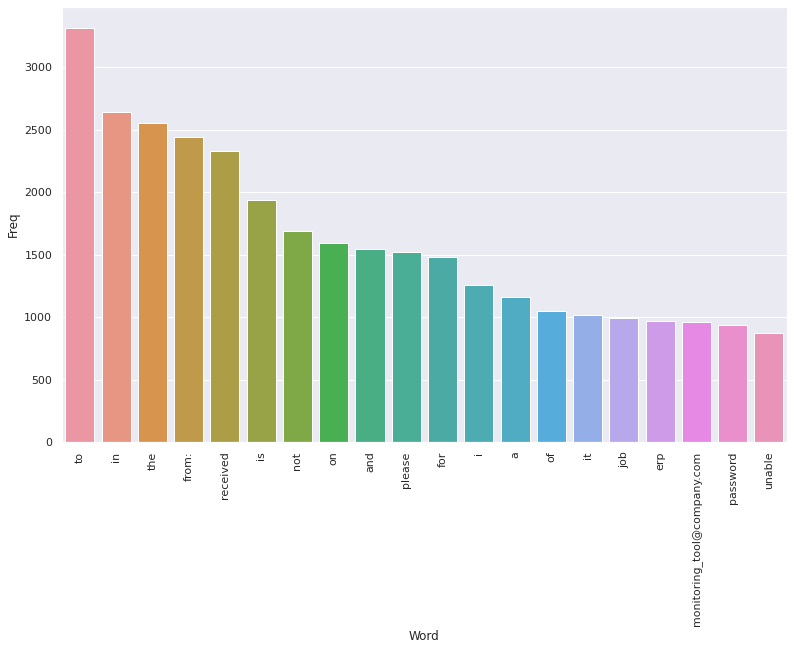

In [34]:
top_df = pd.DataFrame(freq)
top_df.reset_index(level=0, inplace=True) 
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [35]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(mydata['Raw Combined description']).split()).value_counts()[-20:]
freq1

brianna                             1
7112610434                          1
qcxivzag.vyucbagx@gmail.com         1
chain.                              1
.ethics                             1
"infosthryda".                      1
2.contact                           1
电脑系统启动蓝屏。                           1
competitive                         1
04:25:00                            1
mbps,                               1
12:21                               1
power.                              1
meinerseits                         1
tesscenter                          1
df-8b-c-0/000192604484/localhost    1
terminating                         1
24870388                            1
nxd/71880207/000/00                 1
2:31                                1
dtype: int64

[Text(0, 0, 'brianna'),
 Text(1, 0, '7112610434'),
 Text(2, 0, 'qcxivzag.vyucbagx@gmail.com'),
 Text(3, 0, 'chain.'),
 Text(4, 0, '.ethics'),
 Text(5, 0, '"infosthryda".'),
 Text(6, 0, '2.contact'),
 Text(7, 0, '电脑系统启动蓝屏。'),
 Text(8, 0, 'competitive'),
 Text(9, 0, '04:25:00'),
 Text(10, 0, 'mbps,'),
 Text(11, 0, '12:21'),
 Text(12, 0, 'power.'),
 Text(13, 0, 'meinerseits'),
 Text(14, 0, 'tesscenter'),
 Text(15, 0, 'df-8b-c-0/000192604484/localhost'),
 Text(16, 0, 'terminating'),
 Text(17, 0, '24870388'),
 Text(18, 0, 'nxd/71880207/000/00'),
 Text(19, 0, '2:31')]

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21551 missing from current font.
  font.set_text(s

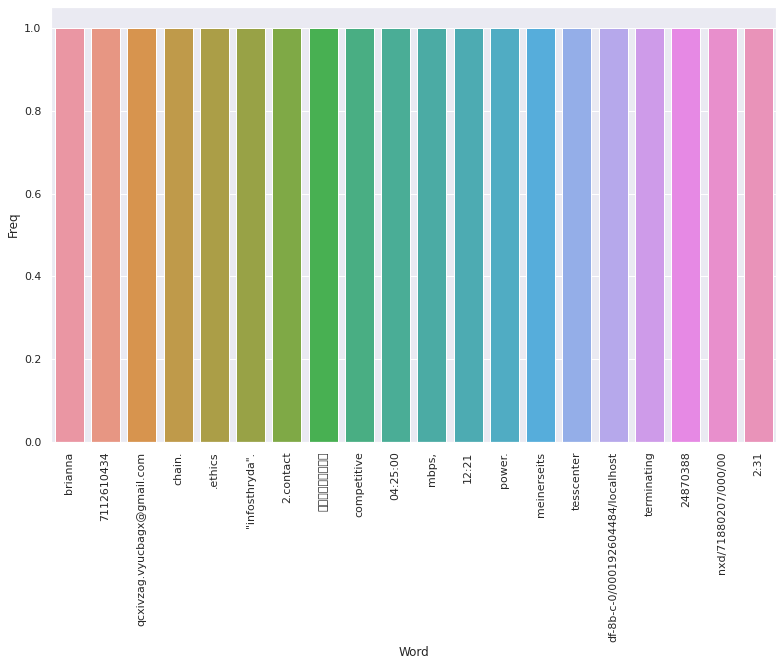

In [36]:
top_df = pd.DataFrame(freq1)
top_df.reset_index(level=0, inplace=True) 
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [37]:
#data = mydata
#data["Assignment group"] = data["Assignment group"].apply(lambda x: x.replace("GRP_", ""))
#data["Assignment group"] = data["Assignment group"].astype(int)
#data

##### Now let's cleanup the null values in Short Description and Description fields

In [38]:
mydata[mydata['Description'].isnull()]

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count]
Index: []

In [39]:
mydata[mydata['Short description'].isnull()]

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count]
Index: []

In [40]:
#Replace NaN values in Short Description and Description columns
#mydata['Short description'] = mydata['Short description'].replace(np.nan, '', regex=True)
#mydata['Description'] = mydata['Description'].replace(np.nan, '', regex=True)

In [41]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count]
Index: []

In [42]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Short description         8500 non-null   object
 1   Description               8500 non-null   object
 2   Assignment group          8500 non-null   object
 3   Raw Combined description  8500 non-null   object
 4   raw_word_count            8500 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 332.2+ KB


In [43]:
mydata.iloc[1178,:]

Short description           电话机没有声音
Description                 电话机没有声音
Assignment group             GRP_30
Raw Combined description    电话机没有声音
raw_word_count                    1
Name: 1178, dtype: object

In [44]:
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  
False                      8500            8500

In [45]:
mydata.head(20)

Short description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr_tool page   
4                                        skype error    
5      unable to log in to engineering tool and skype   
6   event: critical:HostName_221.company.com the v...   
7   ticket_no1550391- employment status - new non-...   
8                unable to disable add ins on outlook   
9                     ticket update on inplant_874773   
10  engineering tool says not connected and unable...   
11            hr_tool site not loading page correctly   
12  unable to login to hr_tool to sgxqsuojr xwbeso...   
13                   user wants to reset the password   
14                           unable to open payslips    
15                    ticket update on inplant_874743   
16                     unable to login to company vpn   
17      when undocking pc , screen will not come back   
18                          erp SID_34 account locked   
19                            unable to sign into vpn   

                                          Description Assignment group  \
0   -verified user details.(employee# & manager na...            GRP_0   
1   \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...            GRP_0   
2   \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...            GRP_0   
3                       unable to access hr_tool page            GRP_0   
4                                        skype error             GRP_0   
5      unable to log in to engineering tool and skype            GRP_0   
6   event: critical:HostName_221.company.com the v...            GRP_1   
7   ticket_no1550391- employment status - new non-...            GRP_0   
8                unable to disable add ins on outlook            GRP_0   
9                     ticket update on inplant_874773            GRP_0   
10  engineering tool says not connected and unable...            GRP_0   
11            hr_tool site not loading page correctly            GRP_0   
12  unable to login to hr_tool to sgxqsuojr xwbeso...            GRP_0   
13                   user wants to reset the password            GRP_0   
14                           unable to open payslips             GRP_0   
15                    ticket update on inplant_874743            GRP_0   
16  \n\nreceived from: xyz@company.com\n\nhi,\n\ni...            GRP_0   
17      when undocking pc , screen will not come back            GRP_3   
18                          erp SID_34 account locked            GRP_0   
19                            unable to sign into vpn            GRP_0   

                             Raw Combined description  raw_word_count  
0   login issue -verified user details.(employee# ...              28  
1   outlook received from: hmjdrvpb.komuaywn@gmail...              24  
2   cant log in to vpn received from: eylqgodm.ybq...              13  
3                       unable to access hr_tool page               5  
4                                         skype error               2  
5         unable to log in engineering tool and skype               8  
6   event: critical:HostName_221.company.com the v...              12  
7   ticket_no1550391- employment status - new non-...               9  
8                unable to disable add ins on outlook               7  
9                     ticket update on inplant_874773               4  
10  engineering tool says not connected and unable...              10  
11            hr_tool site not loading page correctly               6  
12   unable to login hr_tool sgxqsuojr xwbesorf cards               7  
13                   user wants to reset the password               6  
14                            unable to open payslips               4  
15                    ticket update on inplant_874743               4  
16  unable to login company vpn received from: xyz...      

##### Now let's merge the Short Description and Description to a new field - Combined Description . This will help us create a rich corpus
- Please note we are doing this now to help us with the word cloud step. 
- We will repeat this step later again if we find non english characters that we need to translate. This step will be repeated after the translation is done

In [46]:
mydata2 = mydata.copy()

In [47]:
mydata.iloc[1178,:]

Short description           电话机没有声音
Description                 电话机没有声音
Assignment group             GRP_30
Raw Combined description    电话机没有声音
raw_word_count                    1
Name: 1178, dtype: object

In [48]:
#merging  the 2 preprocessed columns to a single column without duplicate words
mydata2['Combined description'] = mydata2['Short description'] .map(str) + ' ' +  mydata2['Description'].map(str)
                    
mydata2['Combined description'] = mydata2['Combined description'].apply(lambda x: ' '.join(pd.unique(x.split()))) 
   
#testing on single entry
print(mydata2.iloc[279]['Short description'])
print(mydata2.iloc[279]['Description'])
print(mydata2.iloc[279]['Combined description']) 
print(mydata2.iloc[7126]['Short description'])
print(mydata2.iloc[7126]['Combined description'])
print(mydata2.iloc[7969]['Description'])
print(mydata2.iloc[7969]['Combined description'])

unable to create delivery:mm#2110924 can print d/n, but can't post. detail information see attachment.
please provide the following:

what order number? 

what material or item number?  mm#2110924

what warehouse location? plant_308 0001 

issue description / error message? see attachment
unable to create delivery:mm#2110924 can print d/n, but can't post. detail information see attachment. please provide the following: what order number? material or item mm#2110924 warehouse location? plant_308 0001 issue description / error message? attachment
电脑卡且连不上内网
电脑卡且连不上内网 received from: tuqrvowp.fxmzkvqo@gmail.com 电脑卡且连不上内网,请转贺正平 tuqrvowp fxmzkvqo 钱唐鑫 human resources tuqrvowp.fxmzkvqo@gmail.com<mailto:tuqrvowp.fxmzkvqo@gmail.com> 中国上海奉贤陈桥路1508号
客户提供的在线送货单生成系统打不开,需尽快解决
客户提供的在线系统打不开 客户提供的在线送货单生成系统打不开,需尽快解决


# now let's print the word cloud
- Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of al data (such as a speech blog post, or database), the bigger and bolder it appears in the word cloud.

- A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

- Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two. 

#### We will print the word cloud for the top 5 groups - GRP_0, GRP_8, GRP_24, GRP_12, GRP_9

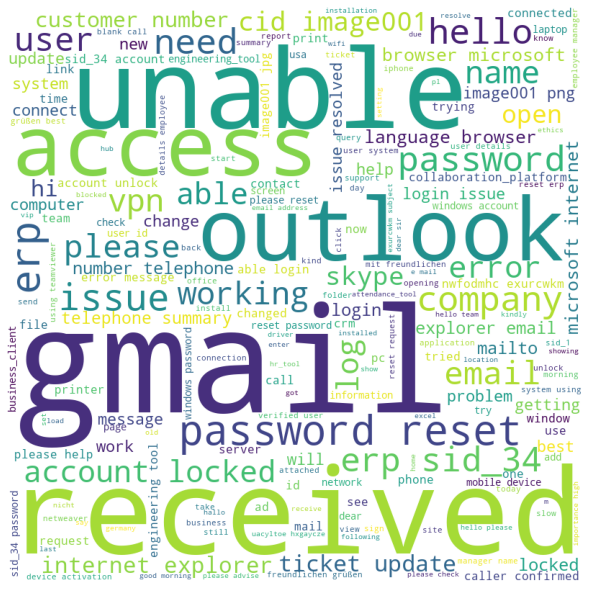

In [49]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_0']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

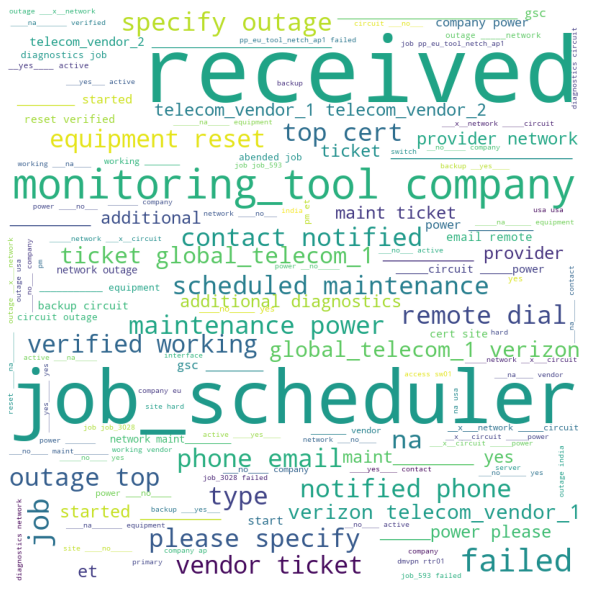

In [50]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_8']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

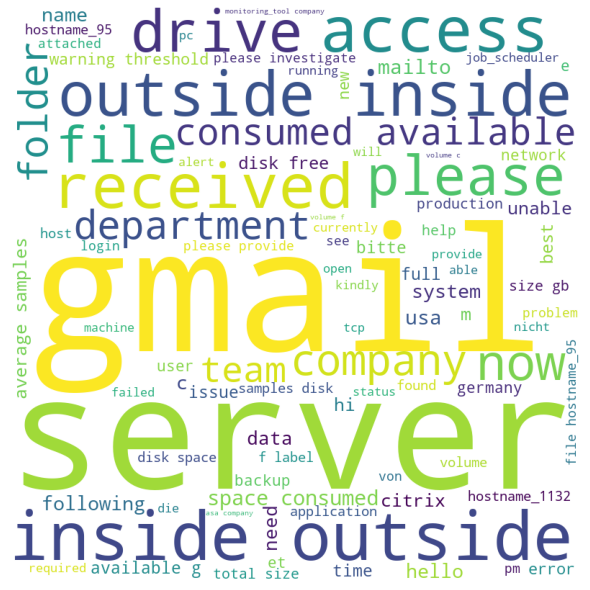

In [51]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_12']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

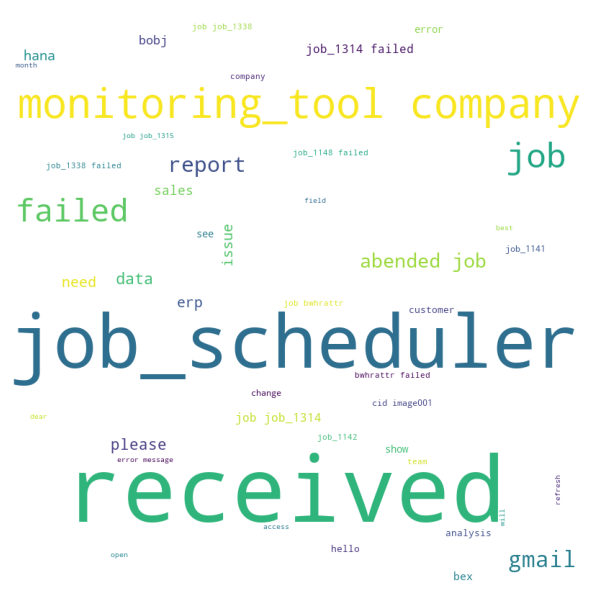

In [52]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_9']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

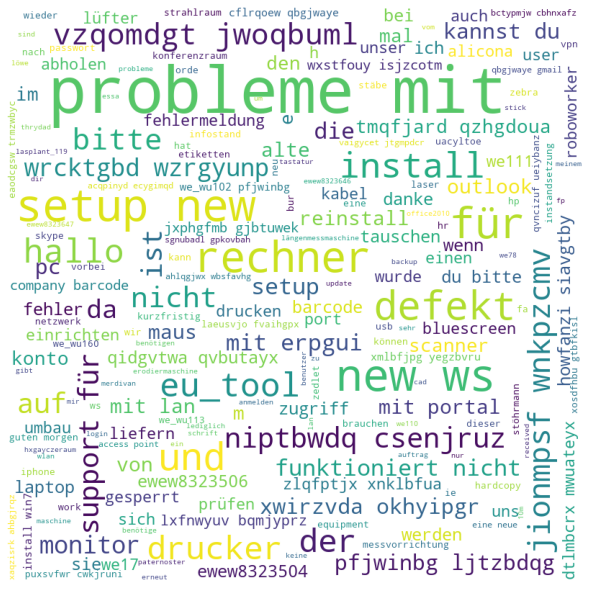

In [53]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_24']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

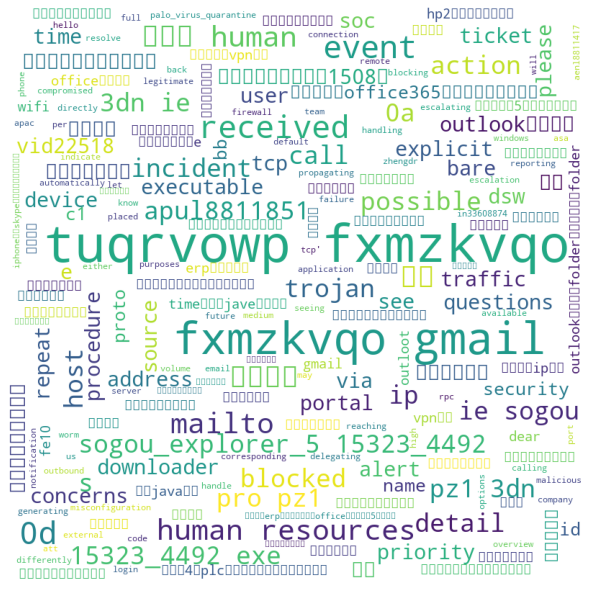

In [54]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_30']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#### Observation
- Many non english words in GRP_24
- In GRP_30 there are many special characters 
#### Let us take a quick diversion to look into this further a little bit more
- We will first run the google's language detect in multi-threaded fashion

In [55]:
pool = ThreadPool(20) # Threads

def request(text):
    #lang = "zh"
    t = google_translator(timeout=20)
#    print("Detect Text " + text)
    detect_text = t.detect(text)
    #print(detect_text)
    return detect_text

if __name__ == "__main__" :
      time1 = time.time()
      #with open("datasets/ShortDescriptions.txt",'r',encoding='utf-8') as f_p:
      # texts = f_p.readlines()
      #print(texts)
      data = mydata2['Short description'].values.tolist()
      try:
          results = pool.map(request, data)
          #print(results)
      except Exception as e:
          raise e
      pool.close()
      pool.join()

      time2 = time.time()
      print("Detecting %s Short Desciptions, a total of %s s"%(len(data),time2 - time1))

Detecting 8500 Short Desciptions, a total of 113.5155098438263 s


#### We will load the results to a dataframe and print the last few rows

In [56]:
df = pd.DataFrame (results,columns=['language', 'language name'])
df.tail()

language language name
8495       en       english
8496       en       english
8497       en       english
8498       pt    portuguese
8499       de        german

In [57]:
mydata2.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  
False                      8500            8500                  8500

In [58]:
df.isna().apply(pd.value_counts)

language  language name
False      8500           8500

#### Counts by language

In [59]:
df["language"].value_counts()

en       7578
de        634
zh-CN     145
nl         22
pt         18
pl          9
lb          9
hi          8
da          8
ar          7
ro          6
fr          5
el          4
sv          4
es          4
ru          4
tl          3
hu          3
mt          3
gl          3
gu          2
ja          2
vi          2
zu          1
bn          1
uz          1
mr          1
eu          1
no          1
cs          1
ca          1
cy          1
it          1
fy          1
tr          1
fi          1
sm          1
sl          1
af          1
ku          1
Name: language, dtype: int64

### We will graph the distribution of languages

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


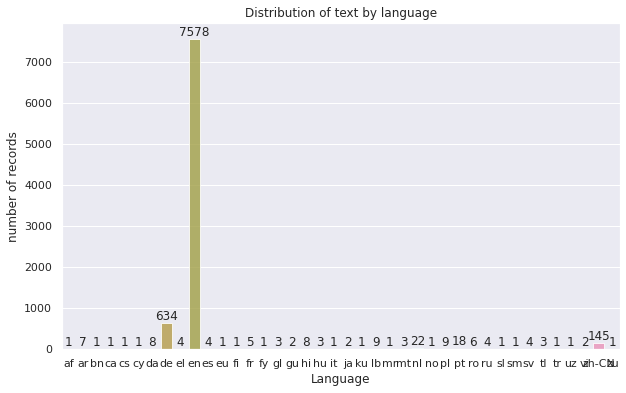

In [60]:
cycol = cycle('bgrcmk')
x = df["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

# Observation
- Most items are in English followed by German
- The other languages are in low single digits - a could in low 2 digits. 

In [61]:
##Reconfirmation
null_data = mydata2[mydata2.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description]
Index: []

#### We will merge the language columns into the main dataframe

In [62]:
df

language language name
0          en       english
1          en       english
2          en       english
3          en       english
4          en       english
...       ...           ...
8495       en       english
8496       en       english
8497       en       english
8498       pt    portuguese
8499       de        german

[8500 rows x 2 columns]

In [63]:
mydata3=mydata.copy()
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  
False                      8500            8500

In [64]:
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  
False                      8500            8500

In [65]:
mydata = mydata2.join(df)
mydata.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                       machine não está funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description Assignment group  \
8495  \n\nreceived from: avglmrts.vhqmtiua@gmail.com...           GRP_29   
8496                           telephony_software issue            GRP_0   
8497  vip2: windows password reset for tifpdchb pedx...            GRP_0   
8498  i am unable to access the machine utilities to...           GRP_62   
8499  an mehreren pc`s lassen sich verschiedene prgr...           GRP_49   

                               Raw Combined description  raw_word_count  \
8495  emails not coming in from zz mail received fro...              21   
8496                           telephony_software issue               2   
8497  vip2: windows password reset for tifpdchb pedx...               7   
8498  machine não está funcionando i am unable to ac...              18   
8499  an mehreren pc`s lassen sich verschiedene prgr...              11   

                                   Combined description language language name  
8495  emails not coming in from zz mail received fro...       en       english  
8496                           telephony_software issue       en       english  
8497  vip2: windows password reset for tifpdchb pedx...       en       english  
8498  machine não está funcionando i am unable to ac...       pt    portuguese  
8499  an mehreren pc`s lassen sich verschiedene prgr...       de        german

#### Observation
- It is interesting to see row 8498 . Short description is in Portugese but Description is in English. 
- The Combine Description gets interpreted as English (we ran the detect alogrithm separately to confirm this)

#### This is the reason we decided to translate Short description and Description independently and then merge them.

In [66]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name]
Index: []

In [67]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]
#empty_space[['Raw Combined description', 'Assignment group']]
empty_space

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name]
Index: []

In [68]:
# Select columns for cleaning
#columnsToPreprocess = ['Short description', 'Description']
#columnsToPreprocess = ['Combined description', 'Short description', 'Description']
# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
#mydata = preprocess(mydata, columnsToPreprocess, getRegexList())

In [69]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name]
Index: []

In [70]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]
empty_space

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name]
Index: []

### We will attempt Translation into english all the non-english rows

In [71]:
pool = ThreadPool(20) # Threads

def request(text):
    t = google_translator(timeout=20)
    translate_text = t.translate(text, lang_tgt='en')
    return translate_text

if __name__ == "__main__" :
      time1 = time.time()
      data = mydata['Short description'].values.tolist()
      try:
          results = pool.map(request, data)
          #print(results)
      except Exception as e:
          raise e
      pool.close()
      pool.join()

      time2 = time.time()

In [72]:
print("Translating %s Short Descriptions, a total of %s s"%(len(data),time2 - time1))

Translating 8500 Short Descriptions, a total of 115.870778799057 s


In [73]:
df = pd.DataFrame (results,columns=['Translated Short description'])
df.tail()

Translated Short description
8495                 emails not coming in from zz mail 
8496                          telephony software issue 
8497  vip2: windows password reset for tifpdchb pedx...
8498                            machine is not working 
8499  Different programs cannot be opened on several...

In [74]:
## Missing data check #2 : 
## Are there any null values
mydata.isna().apply(pd.value_counts)
## Short Description contains 2 nulls and Description contains 1 null 

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  \
False                      8500            8500                  8500   

       language  language name  
False      8500           8500

In [75]:
df.isna().apply(pd.value_counts)

Translated Short description
False                          8500

In [76]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name]
Index: []

In [77]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]

#### We will merge the Translated Short description column into the main dataframe

In [78]:
mydata2 = mydata
mydata = mydata.join(df)
mydata.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                       machine não está funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description Assignment group  \
8495  \n\nreceived from: avglmrts.vhqmtiua@gmail.com...           GRP_29   
8496                           telephony_software issue            GRP_0   
8497  vip2: windows password reset for tifpdchb pedx...            GRP_0   
8498  i am unable to access the machine utilities to...           GRP_62   
8499  an mehreren pc`s lassen sich verschiedene prgr...           GRP_49   

                               Raw Combined description  raw_word_count  \
8495  emails not coming in from zz mail received fro...              21   
8496                           telephony_software issue               2   
8497  vip2: windows password reset for tifpdchb pedx...               7   
8498  machine não está funcionando i am unable to ac...              18   
8499  an mehreren pc`s lassen sich verschiedene prgr...              11   

                                   Combined description language  \
8495  emails not coming in from zz mail received fro...       en   
8496                           telephony_software issue       en   
8497  vip2: windows password reset for tifpdchb pedx...       en   
8498  machine não está funcionando i am unable to ac...       pt   
8499  an mehreren pc`s lassen sich verschiedene prgr...       de   

     language name                       Translated Short description  
8495       english                 emails not coming in from zz mail   
8496       english                          telephony software issue   
8497       english  vip2: windows password reset for tifpdchb pedx...  
8498    portuguese                            machine is not working   
8499        german  Different programs cannot be opened on several...

In [79]:
pool = ThreadPool(20) # Threads

def request(text):
    t = google_translator(timeout=25)
    translate_text = t.translate(text.strip(), lang_tgt='en')
    return translate_text

if __name__ == "__main__" :
      time1 = time.time()
      data = mydata['Description'].values.tolist()
      try:
          results = pool.map(request, data)
          #print(results)
      except Exception as e:
          raise e
      pool.close()
      pool.join()

      time2 = time.time()
      print("Translating %s Descriptions, a total of %s s"%(len(data),time2 - time1))

Translating 8500 Descriptions, a total of 108.94177460670471 s


In [80]:
 print("Translating %s Descriptions, a total of %s s"%(len(data),time2 - time1))

Translating 8500 Descriptions, a total of 108.94177460670471 s


In [81]:
df = pd.DataFrame (results,columns=['Translated Description'])
df.tail()

Translated Description
8495  received from: avglmrts.vhqmtiua@gmail.com\n\n...
8496                          telephony software issue 
8497  vip2: windows password reset for tifpdchb pedx...
8498  i am unable to access the machine utilities to...
8499  Different programs cannot be opened on several...

In [82]:
## Missing data check #2 : 
## Are there any null values
mydata.isna().apply(pd.value_counts)
## Short Description contains 2 nulls and Description contains 1 null 

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  \
False                      8500            8500                  8500   

       language  language name  Translated Short description  
False      8500           8500                          8500

In [83]:
df.isna().apply(pd.value_counts)

Translated Description
False                    8500

#### We will merge the Combined Description column into the main dataframe

In [84]:
mydata2 = mydata
mydata = mydata.join(df)
mydata.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                       machine não está funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description Assignment group  \
8495  \n\nreceived from: avglmrts.vhqmtiua@gmail.com...           GRP_29   
8496                           telephony_software issue            GRP_0   
8497  vip2: windows password reset for tifpdchb pedx...            GRP_0   
8498  i am unable to access the machine utilities to...           GRP_62   
8499  an mehreren pc`s lassen sich verschiedene prgr...           GRP_49   

                               Raw Combined description  raw_word_count  \
8495  emails not coming in from zz mail received fro...              21   
8496                           telephony_software issue               2   
8497  vip2: windows password reset for tifpdchb pedx...               7   
8498  machine não está funcionando i am unable to ac...              18   
8499  an mehreren pc`s lassen sich verschiedene prgr...              11   

                                   Combined description language  \
8495  emails not coming in from zz mail received fro...       en   
8496                           telephony_software issue       en   
8497  vip2: windows password reset for tifpdchb pedx...       en   
8498  machine não está funcionando i am unable to ac...       pt   
8499  an mehreren pc`s lassen sich verschiedene prgr...       de   

     language name                       Translated Short description  \
8495       english                 emails not coming in from zz mail    
8496       english                          telephony software issue    
8497       english  vip2: windows password reset for tifpdchb pedx...   
8498    portuguese                            machine is not working    
8499        german  Different programs cannot be opened on several...   

                                 Translated Description  
8495  received from: avglmrts.vhqmtiua@gmail.com\n\n...  
8496                          telephony software issue   
8497  vip2: windows password reset for tifpdchb pedx...  
8498  i am unable to access the machine utilities to...  
8499  Different programs cannot be opened on several...

### We will merge the Short description and Description Columns again

In [85]:
#merging  the 2 preprocessed columns to a single column without duplicate words
mydata['Combined description'] = mydata['Translated Short description'] .map(str) + ' ' +  mydata['Translated Description'].map(str)
                    
mydata['Combined description'] = mydata['Combined description'].apply(lambda x: ' '.join(pd.unique(x.split()))) 
   
#testing on single entry
print(mydata.iloc[279]['Short description'])
print(mydata.iloc[279]['Description'])
print(mydata.iloc[279]['Combined description']) 
print(mydata.iloc[7126]['Short description'])
print(mydata.iloc[7126]['Combined description'])
print(mydata.iloc[7969]['Description'])
print(mydata.iloc[7969]['Combined description'])

unable to create delivery:mm#2110924 can print d/n, but can't post. detail information see attachment.
please provide the following:

what order number? 

what material or item number?  mm#2110924

what warehouse location? plant_308 0001 

issue description / error message? see attachment
unable to create delivery:mm#2110924 can print d/n, but can't post. detail information see attachment. please provide the following: what order number? material or item mm#2110924 warehouse location? plant_308 0001 issue description / error message? attachment
电脑卡且连不上内网
The computer card cannot connect to the intranet received from: tuqrvowp.fxmzkvqo@gmail.com is not connected intranet, please forward He Zhengping tuqrvowp fxmzkvqo Qian Tangxin human resources tuqrvowp.fxmzkvqo@gmail.com<mailto:tuqrvowp.fxmzkvqo@gmail.com> 1508 Chenqiao Road, Fengxian, Shanghai, China
客户提供的在线送货单生成系统打不开,需尽快解决
The online system provided by the customer cannot be opened delivery note generation and needs to resolved as s

In [86]:
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  \
False                      8500            8500                  8500   

       language  language name  Translated Short description  \
False      8500           8500                          8500   

       Translated Description  
False                    8500

In [87]:
rows = mydata.iloc[8499]
rows

Short description               an mehreren pc`s lassen sich verschiedene prgr...
Description                     an mehreren pc`s lassen sich verschiedene prgr...
Assignment group                                                           GRP_49
Raw Combined description        an mehreren pc`s lassen sich verschiedene prgr...
raw_word_count                                                                 11
Combined description            Different programs cannot be opened on several...
language                                                                       de
language name                                                              german
Translated Short description    Different programs cannot be opened on several...
Translated Description          Different programs cannot be opened on several...
Name: 8499, dtype: object

In [88]:
mydata.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                       machine não está funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description Assignment group  \
8495  \n\nreceived from: avglmrts.vhqmtiua@gmail.com...           GRP_29   
8496                           telephony_software issue            GRP_0   
8497  vip2: windows password reset for tifpdchb pedx...            GRP_0   
8498  i am unable to access the machine utilities to...           GRP_62   
8499  an mehreren pc`s lassen sich verschiedene prgr...           GRP_49   

                               Raw Combined description  raw_word_count  \
8495  emails not coming in from zz mail received fro...              21   
8496                           telephony_software issue               2   
8497  vip2: windows password reset for tifpdchb pedx...               7   
8498  machine não está funcionando i am unable to ac...              18   
8499  an mehreren pc`s lassen sich verschiedene prgr...              11   

                                   Combined description language  \
8495  emails not coming in from zz mail received fro...       en   
8496                           telephony software issue       en   
8497  vip2: windows password reset for tifpdchb pedx...       en   
8498  machine is not working i am unable to access t...       pt   
8499  Different programs cannot be opened on several...       de   

     language name                       Translated Short description  \
8495       english                 emails not coming in from zz mail    
8496       english                          telephony software issue    
8497       english  vip2: windows password reset for tifpdchb pedx...   
8498    portuguese                            machine is not working    
8499        german  Different programs cannot be opened on several...   

                                 Translated Description  
8495  received from: avglmrts.vhqmtiua@gmail.com\n\n...  
8496                          telephony software issue   
8497  vip2: windows password reset for tifpdchb pedx...  
8498  i am unable to access the machine utilities to...  
8499  Different programs cannot be opened on several...

In [89]:
row = mydata.iloc[1954]
row

Short description                                          笔记本重新装下系统
Description                                             把我的笔记本重新装下系统
Assignment group                                              GRP_30
Raw Combined description                      笔记本重新装下系统 把我的笔记本重新装下系统
raw_word_count                                                     2
Combined description            Reinstall the system on laptop my in
language                                                       zh-CN
language name                                   chinese (simplified)
Translated Short description     Reinstall the system on the laptop 
Translated Description            Reinstall my laptop in the system 
Name: 1954, dtype: object

In [90]:
df = mydata.query('Description == ""')
df

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name, Translated Short description, Translated Description]
Index: []

In [91]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]
empty_space

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name, Translated Short description, Translated Description]
Index: []

In [92]:
mydata.iloc[1178,:]

Short description                                电话机没有声音
Description                                      电话机没有声音
Assignment group                                  GRP_30
Raw Combined description                         电话机没有声音
raw_word_count                                         1
Combined description             No sound from the phone
language                                           zh-CN
language name                       chinese (simplified)
Translated Short description    No sound from the phone 
Translated Description          No sound from the phone 
Name: 1178, dtype: object

# Preprocessing
### We will now attempt to remove unwanted text in the columns of interest to us: 
- Combined description

In [93]:
# Select columns for cleaning
#columnsToPreprocess = ['Short description', 'Description']
columnsToPreprocess = ['Combined description']
# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
mydata = preprocess(mydata, columnsToPreprocess, getRegexList())

In [94]:
mydata.head(20)

Short description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr_tool page   
4                                        skype error    
5      unable to log in to engineering tool and skype   
6   event: critical:HostName_221.company.com the v...   
7   ticket_no1550391- employment status - new non-...   
8                unable to disable add ins on outlook   
9                     ticket update on inplant_874773   
10  engineering tool says not connected and unable...   
11            hr_tool site not loading page correctly   
12  unable to login to hr_tool to sgxqsuojr xwbeso...   
13                   user wants to reset the password   
14                           unable to open payslips    
15                    ticket update on inplant_874743   
16                     unable to login to company vpn   
17      when undocking pc , screen will not come back   
18                          erp SID_34 account locked   
19                            unable to sign into vpn   

                                          Description Assignment group  \
0   -verified user details.(employee# & manager na...            GRP_0   
1   \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...            GRP_0   
2   \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...            GRP_0   
3                       unable to access hr_tool page            GRP_0   
4                                        skype error             GRP_0   
5      unable to log in to engineering tool and skype            GRP_0   
6   event: critical:HostName_221.company.com the v...            GRP_1   
7   ticket_no1550391- employment status - new non-...            GRP_0   
8                unable to disable add ins on outlook            GRP_0   
9                     ticket update on inplant_874773            GRP_0   
10  engineering tool says not connected and unable...            GRP_0   
11            hr_tool site not loading page correctly            GRP_0   
12  unable to login to hr_tool to sgxqsuojr xwbeso...            GRP_0   
13                   user wants to reset the password            GRP_0   
14                           unable to open payslips             GRP_0   
15                    ticket update on inplant_874743            GRP_0   
16  \n\nreceived from: xyz@company.com\n\nhi,\n\ni...            GRP_0   
17      when undocking pc , screen will not come back            GRP_3   
18                          erp SID_34 account locked            GRP_0   
19                            unable to sign into vpn            GRP_0   

                             Raw Combined description  raw_word_count  \
0   login issue -verified user details.(employee# ...              28   
1   outlook received from: hmjdrvpb.komuaywn@gmail...              24   
2   cant log in to vpn received from: eylqgodm.ybq...              13   
3                       unable to access hr_tool page               5   
4                                         skype error               2   
5         unable to log in engineering tool and skype               8   
6   event: critical:HostName_221.company.com the v...              12   
7   ticket_no1550391- employment status - new non-...               9   
8                unable to disable add ins on outlook               7   
9                     ticket update on inplant_874773               4   
10  engineering tool says not connected and unable...              10   
11            hr_tool site not loading page correctly               6   
12   unable to login hr_tool sgxqsuojr xwbesorf cards               7   
13                   user wants to reset the password               6   
14                            unable to open payslips               4   
15                    ticket update on inplant_874743               4   
16  unable to login company vpn received f

In [95]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]
empty_space

Short description                      Description  \
8043  setup new ws \xaqzisrk ahbgjrqz  setup new ws \xaqzisrk ahbgjrqz   
8072  setup new ws \pnwbkitv phbnwmkl  setup new ws \pnwbkitv phbnwmkl   

     Assignment group         Raw Combined description  raw_word_count  \
8043           GRP_24  setup new ws \xaqzisrk ahbgjrqz               5   
8072           GRP_24  setup new ws \pnwbkitv phbnwmkl               5   

     Combined description language language name  \
8043                            el         greek   
8072                            el         greek   

           Translated Short description             Translated Description  
8043  σετύπ νέω ως \ χάκζησρκ αχβγξρκζ   σετύπ νέω ως \ χάκζησρκ αχβγξρκζ   
8072   σετύπ νέω ως \ πνωβκίτυ φβνωμκλ    σετύπ νέω ως \ πνωβκίτυ φβνωμκλ

In [96]:
mydata.at[8043,'Combined description']=mydata.iloc[8043]['Description']
mydata.at[8072,'Combined description']=mydata.iloc[8072]['Description']

# Observation
- For some reason the translation got confused and marked these as Greek and also translated to Greek . We are manually fixing these back to English

In [97]:
#expand contractions

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# Expanding Contractions in the reviews
mydata['Combined description']=mydata['Combined description'].apply(lambda x:expand_contractions(x))

In [98]:
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  \
False                      8500            8500                  8500   

       language  language name  Translated Short description  \
False      8500           8500                          8500   

       Translated Description  
False                    8500

In [99]:
spell =Speller('en', fast=True)       #Speller(fast=True) for faster but less accurate correctiondata
mydata['Combined description']=[' '.join([spell(i) for i in x.split()]) for x in mydata['Combined description']]

In [100]:
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  \
False                      8500            8500                  8500   

       language  language name  Translated Short description  \
False      8500           8500                          8500   

       Translated Description  
False                    8500

In [101]:
mydata.iloc[255]

Short description               probleme mit laufwerk z: \laeusvjo fvaihgpx
Description                     probleme mit laufwerk z: \laeusvjo fvaihgpx
Assignment group                                                     GRP_24
Raw Combined description        probleme mit laufwerk z: \laeusvjo fvaihgpx
raw_word_count                                                            6
Combined description                problems with drive z laeusvjo fvaihgpx
language                                                                 de
language name                                                        german
Translated Short description    problems with drive z: \ laeusvjo fvaihgpx 
Translated Description          problems with drive z: \ laeusvjo fvaihgpx 
Name: 255, dtype: object

In [102]:
#Remove non english words
nltk.download('words')
from nltk.corpus import words
Word = list(set(words.words()))
mydata['Combined description'] = [" ".join(w for w in nltk.wordpunct_tokenize(x) 
                       if w.lower() in Word or not w.isalpha()) 
                       for x in mydata['Combined description']]

#testing one a single entry
print(mydata.iloc[255]['Combined description'])

[nltk_data] Downloading package words to /home/sridhar/nltk_data...
[nltk_data]   Package words is already up-to-date!


with drive z


In [103]:
rows = mydata[mydata['Combined description'] == ""]
print(rows.index)
rows

Int64Index([ 698, 2045, 2070, 2192, 3050, 3432, 4637, 4776, 4857, 5179, 5415,
            5502, 6366, 6496, 6929, 7209, 7391],
           dtype='int64')


Short description                Description Assignment group  \
698        jpg files encrypted        jpg files encrypted             GRP_0   
2045          uacyltoe hxgaycze          uacyltoe hxgaycze           GRP_12   
2070          uacyltoe hxgaycze          uacyltoe hxgaycze           GRP_36   
2192          uacyltoe hxgaycze          uacyltoe hxgaycze            GRP_0   
3050          vpn disconnecting          vpn disconnecting            GRP_0   
3432                        dds                        dss            GRP_0   
4637                erp queries                erp queries            GRP_0   
4776              restoring ppt              restoring ppt            GRP_0   
4857               vpn queries                vpn queries             GRP_0   
5179  windows zdsxmcwu thdjzolw  windows zdsxmcwu thdjzolw            GRP_0   
5415          mapping printers           mapping printers             GRP_0   
5502          mapping printers           mapping printers             GRP_0   
6366              email queries              email queries            GRP_0   
6496        installing cutview         installing cutview            GRP_66   
6929         spam email queries         spam email queries            GRP_0   
7209              email queries              email queries            GRP_0   
7391                vpn queries                vpn queries            GRP_0   

       Raw Combined description  raw_word_count Combined description language  \
698         jpg files encrypted               3                            en   
2045          uacyltoe hxgaycze               2                            pl   
2070          uacyltoe hxgaycze               2                            pl   
2192          uacyltoe hxgaycze               2                            pl   
3050          vpn disconnecting               2                            en   
3432                    dds dss               2                            en   
4637                erp queries               2                            en   
4776              restoring ppt               2                            en   
4857                vpn queries               2                            en   
5179  windows zdsxmcwu thdjzolw               3                            en   
5415           mapping printers               2                            en   
5502           mapping printers               2                            en   
6366              email queries               2                            en   
6496         installing cutview               2                            en   
6929         spam email queries               3                            en   
7209              email queries               2                            en   
7391                vpn queries               2                            en   

     language name Translated Short description      Translated Description  
698        english         jpg files encrypted         jpg files encrypted   
2045        polish           uacyltoe hxgaycze           uacyltoe hxgaycze   
2070        polish           uacyltoe hxgaycze           uacyltoe hxgaycze   
2192        polish           uacyltoe hxgaycze           uacyltoe hxgaycze   
3050       english           vpn disconnecting           vpn disconnecting   
3432       english                         dds                         dss   
4637       english                 erp queries                 erp queries   
4776       english               restoring ppt               restoring ppt   
4857       english                 vpn queries                 vpn queries   
5179       english   windows zdsxmcwu thdjzolw   windows zdsxmcwu thdjzolw   
5415       english            mapping printers            mapping printers   
5502       english            mapping printers            mapping printers   
6366       english               email queries               email queries   
6496       english          installing c

# Observation
- For some reason the translation and remove regex alogrithms got confused and did not do their job for these rows properly . We are manually fixing these entries
- We can drop rows  2045, 2070, 2192 because they look like junk BUT at this point we will just keep them

In [104]:
for row_no in rows.index:
    mydata.at[row_no,'Combined description']=mydata.iloc[row_no]['Raw Combined description']

In [105]:
rows = mydata[mydata['Combined description'] == ""]
rows

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name, Translated Short description, Translated Description]
Index: []

# We are creating the dataset required for Deep Learning first
- This data set contains all the stop words too which are important for DL algorithms for Context retention
- This dataset will not contain the lemmatization  which is to follow later

In [106]:
mydata_dl = mydata[['Combined description', 'Assignment group']]
#mydata_dl = mydata_dl.drop(mydata_dl.index[mydata_dl["Combined description"] == ''])
mydata_dl = mydata_dl.rename(columns = {'Combined description':'Combined Description Cleaned'}) 
mydata_dl = mydata_dl.reset_index(drop=True)
mydata_dl.to_csv('datasets/input_data_after_preprocessing_for_dl.csv') 
mydata_dl.describe()

Combined Description Cleaned Assignment group
count                                       8500             8500
unique                                      6426               74
top     job job in job schedule at received from            GRP_0
freq                                         431             3976

In [107]:
mydata_dl

Combined Description Cleaned Assignment group
0     login issue user manager name checked the name...            GRP_0
1     outlook received from hello team my are not in...            GRP_0
2     cannot log in to received from hi i cannot on ...            GRP_0
3                            unable to access tool page            GRP_0
4                                                 error            GRP_0
...                                                 ...              ...
8495  not coming in from mail received from good aft...           GRP_29
8496                                    telephony issue            GRP_0
8497                                 password reset for            GRP_0
8498  machine is not working i am unable to access t...           GRP_62
8499                different cannot be on several area           GRP_49

[8500 rows x 2 columns]

In [108]:
mydata['CombinedWordCount'] = [len(desc.split(' ')) for desc in mydata['Combined description']]
mydata.head()
wordCount_before_lemmatization = mydata['CombinedWordCount'].sum()
print("Total Corpus Word Count before lemmatization: ", wordCount_before_lemmatization)

Total Corpus Word Count before lemmatization:  137536


In [109]:
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  \
False                      8500            8500                  8500   

       language  language name  Translated Short description  \
False      8500           8500                          8500   

       Translated Description  CombinedWordCount  
False                    8500               8500

In [110]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('please')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sridhar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'p

In [111]:
nltk.download('punkt')
nltk.download('wordnet')
mydata['Combined Description Cleaned'] = lemmatize(mydata['Combined description'])

[nltk_data] Downloading package punkt to /home/sridhar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sridhar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [112]:
mydata['CombinedWordCountCleaned'] = [len(desc.split(' ')) for desc in mydata['Combined Description Cleaned']]
wordCount_after_lemmatization = mydata['CombinedWordCountCleaned'].sum()
print("Total Corpus Word Count after lemmatization: ", wordCount_after_lemmatization)
print("Max word count of a Document: ", mydata['CombinedWordCountCleaned'].max())
print("Mean word count of Documents: ", mydata['CombinedWordCountCleaned'].mean())

Total Corpus Word Count after lemmatization:  82252
Max word count of a Document:  143
Mean word count of Documents:  9.676705882352941


### Creating a vector of word counts
- we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. 
- We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

###### Parameters used
- cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
- max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.
- max_features — determines the number of columns in the matrix.
- n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.

In [113]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(mydata['Combined description'])

### Visualize top 20 uni-grams, bi-grams & tri-grams

[Text(0, 0, 'job'),
 Text(1, 0, 'receive'),
 Text(2, 0, 'password'),
 Text(3, 0, 'tool'),
 Text(4, 0, 'schedule'),
 Text(5, 0, 'work'),
 Text(6, 0, 'reset'),
 Text(7, 0, 'issue'),
 Text(8, 0, 'unable'),
 Text(9, 0, 'user'),
 Text(10, 0, 'error'),
 Text(11, 0, 'access'),
 Text(12, 0, 'ticket'),
 Text(13, 0, 'need'),
 Text(14, 0, 'account'),
 Text(15, 0, 'company'),
 Text(16, 0, 'help'),
 Text(17, 0, 'hello'),
 Text(18, 0, 'get'),
 Text(19, 0, 'network'),
 Text(20, 0, 'system'),
 Text(21, 0, 'login'),
 Text(22, 0, 'outlook'),
 Text(23, 0, 'vendor'),
 Text(24, 0, 'message'),
 Text(25, 0, 'power'),
 Text(26, 0, 'see'),
 Text(27, 0, 'hi'),
 Text(28, 0, 'check'),
 Text(29, 0, 'send'),
 Text(30, 0, 'lock'),
 Text(31, 0, 'time'),
 Text(32, 0, 'try'),
 Text(33, 0, 'able'),
 Text(34, 0, 'new'),
 Text(35, 0, 'connect'),
 Text(36, 0, 'team'),
 Text(37, 0, 'best'),
 Text(38, 0, 'open'),
 Text(39, 0, 'outage'),
 Text(40, 0, 'name'),
 Text(41, 0, 'engineer'),
 Text(42, 0, 'log'),
 Text(43, 0, 'number

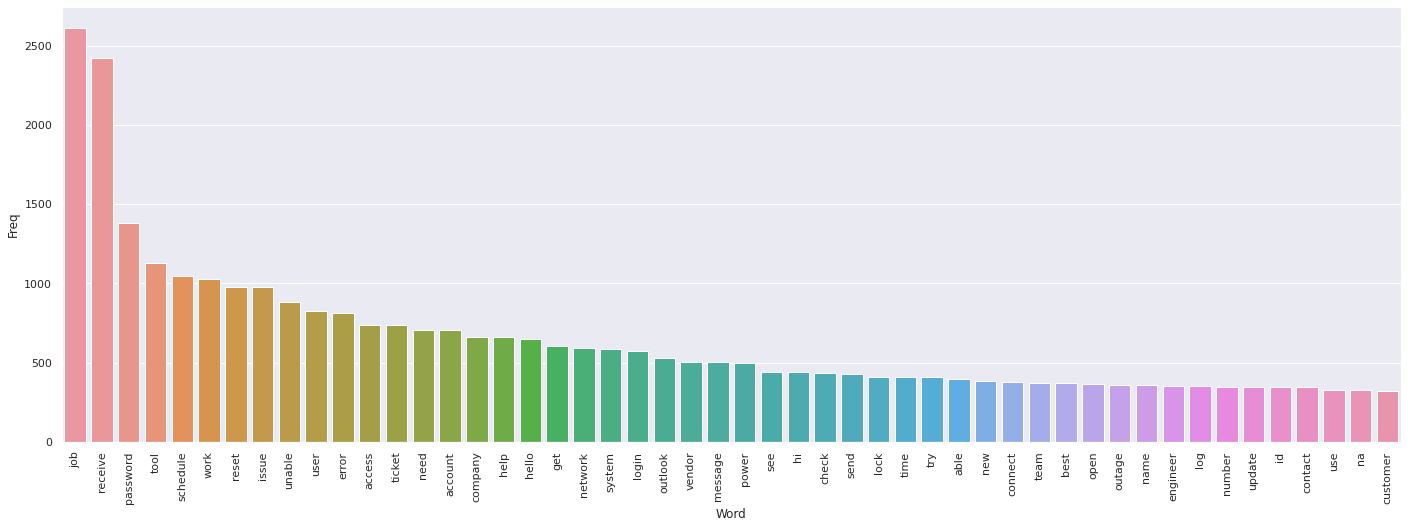

In [114]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(mydata['Combined Description Cleaned'], n=50)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(24,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'job job'),
 Text(1, 0, 'job schedule'),
 Text(2, 0, 'schedule receive'),
 Text(3, 0, 'password reset'),
 Text(4, 0, 'receive hello'),
 Text(5, 0, 'reset password'),
 Text(6, 0, 'receive hi'),
 Text(7, 0, 'account lock'),
 Text(8, 0, 'engineer tool'),
 Text(9, 0, 'management tool'),
 Text(10, 0, 'password management'),
 Text(11, 0, 'collaboration platform'),
 Text(12, 0, 'error message'),
 Text(13, 0, 'customer number'),
 Text(14, 0, 'language explorer'),
 Text(15, 0, 'explorer customer'),
 Text(16, 0, 'receive dear'),
 Text(17, 0, 'ticket update'),
 Text(18, 0, 'number telephone'),
 Text(19, 0, 'ticket global'),
 Text(20, 0, 'schedule job'),
 Text(21, 0, 'vendor vendor'),
 Text(22, 0, 'unable login'),
 Text(23, 0, 'power specify'),
 Text(24, 0, 'specify outage'),
 Text(25, 0, 'outage top'),
 Text(26, 0, 'maintenance power'),
 Text(27, 0, 'provider network'),
 Text(28, 0, 'contact notify'),
 Text(29, 0, 'remote dial'),
 Text(30, 0, 'equipment reset'),
 Text(31, 0, 'vendor t

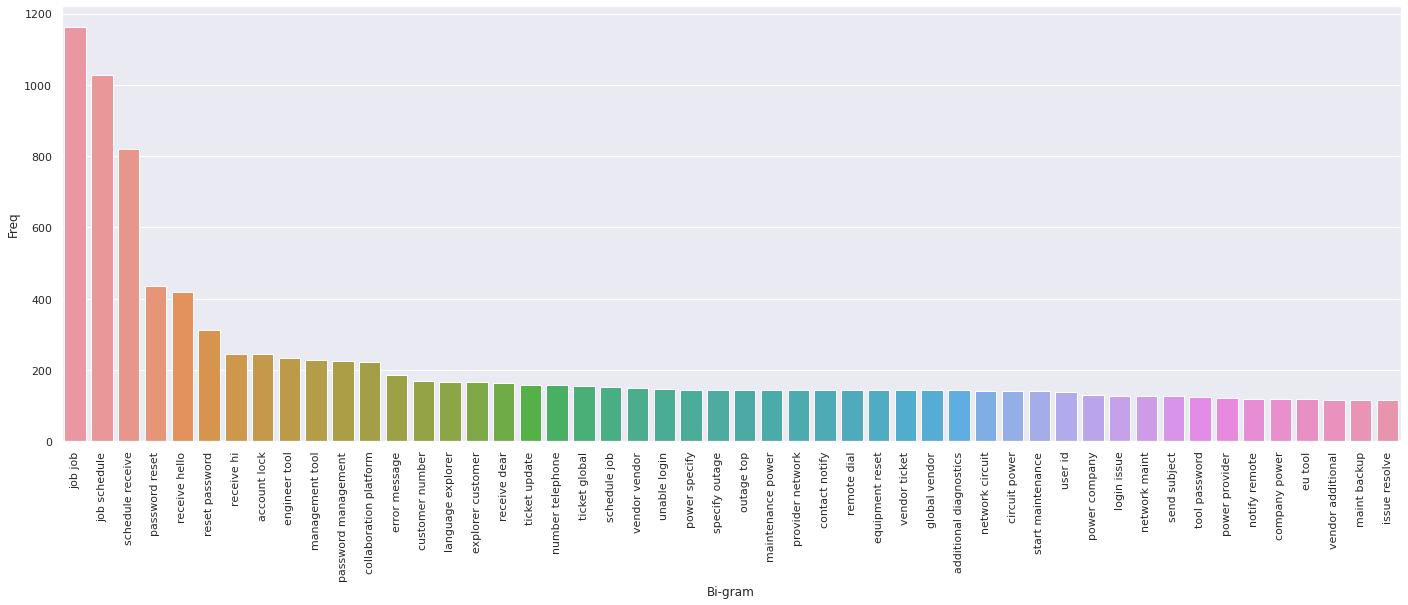

In [115]:
top2_words = get_top_n2_words(mydata['Combined Description Cleaned'], n=50)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(24,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

[Text(0, 0, 'job schedule receive'),
 Text(1, 0, 'job job schedule'),
 Text(2, 0, 'job job job'),
 Text(3, 0, 'password management tool'),
 Text(4, 0, 'explorer customer number'),
 Text(5, 0, 'language explorer customer'),
 Text(6, 0, 'customer number telephone'),
 Text(7, 0, 'job schedule job'),
 Text(8, 0, 'power specify outage'),
 Text(9, 0, 'specify outage top'),
 Text(10, 0, 'vendor ticket global'),
 Text(11, 0, 'ticket global vendor'),
 Text(12, 0, 'global vendor vendor'),
 Text(13, 0, 'circuit power specify'),
 Text(14, 0, 'start maintenance power'),
 Text(15, 0, 'network circuit power'),
 Text(16, 0, 'maintenance power company'),
 Text(17, 0, 'provider network maint'),
 Text(18, 0, 'power provider network'),
 Text(19, 0, 'contact notify remote'),
 Text(20, 0, 'notify remote dial'),
 Text(21, 0, 'company power provider'),
 Text(22, 0, 'vendor vendor additional'),
 Text(23, 0, 'vendor additional diagnostics'),
 Text(24, 0, 'power company power'),
 Text(25, 0, 'management tool pas

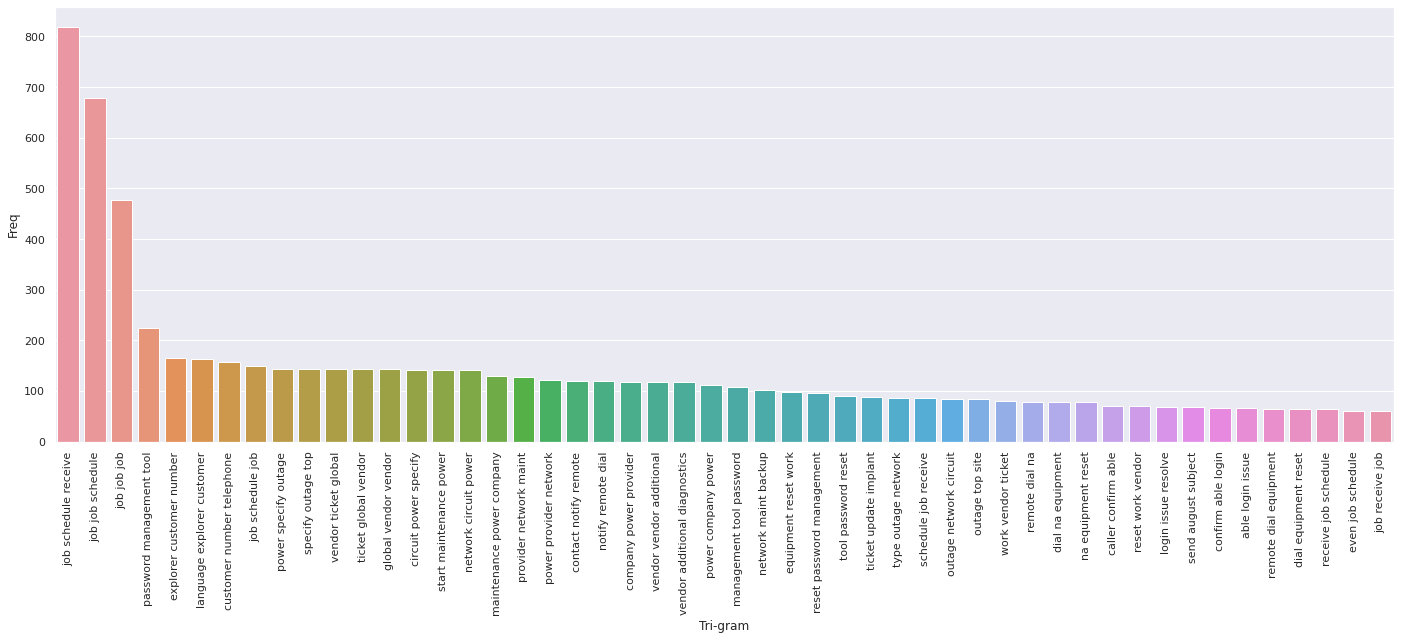

In [116]:
top3_words = get_top_n3_words(mydata['Combined Description Cleaned'], n=50)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(24,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90)

#### Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.

In [117]:
# iterate over rows with iterrows()
doc = ' '
for index, row in mydata.iterrows():
     # access data using column names
     doc = doc + row['Combined Description Cleaned']

In [118]:
doc

' login issue user manager name check name ad reset password advise check caller confirm able login issue resolveoutlook receive hello team calendar somebody advise correct kindlog receive hi bestunable access tool pageerrorunable log engineer toolevent value thresholdticket employment status new enter nameunable disable add outlookticket update implantengineer tool connect unable submittool site load page correctlyunable login tooluser reset passwordunable openticket update implantunable login company receive hi try open new session link able get help urgently work home tomorrow due month endunlock screen come backaccount lockunable signunable checkissue receive hello able connect home office couple f ago connect work get message session click link nothing need help dynamic chat live agent regard bestunable connectuser vendor phone numberwork receive hello able connect company network check sir result networkpassword resetunable login tool checkaccount lockunable login toolunable logp

In [119]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted

#doc=mydata['Combined Description Cleaned'][0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,50)
 
# now print the results
#print("\nAbstract:")
#print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Keywords:
receive 0.394
job 0.25
work 0.176
schedule 0.159
job schedule 0.157
tool 0.15
password 0.134
issue 0.12
get 0.117
vendor 0.112
hello 0.109
user 0.108
error 0.108
send 0.106
power 0.105
try 0.099
company 0.098
network 0.096
need 0.095
system 0.093
help 0.091
access 0.088
message 0.087
outage 0.085
ticket 0.085
follow 0.085
job job 0.083
job job schedule 0.082
see 0.081
hi 0.08
login 0.078
reset 0.078
attach 0.078
na 0.077
time 0.077
check 0.073
team 0.072
use 0.069
yes 0.069
engineer 0.068
name 0.068
number 0.067
connect 0.066
lock 0.063
customer 0.063
open 0.061
circuit 0.061
new 0.061
dial 0.06
plant 0.06


# Document Clustering 
Document Clustering is a process of grouping similar items together. Each group, also called as a cluster, contains items that are similar to each other. Clustering algorithms are unsupervised learning algorithms i.e. we do not need to have labelled datasets. There are many clustering algorithms for clustering including KMeans, DBSCAN, Spectral clustering, hierarchical clustering etc and they have their own advantages and disadvantages. The choice of the algorithm mainly depends on whether or not you already know how many clusters to create. Some algorithms such as KMeans need you to specify the number of clusters to create whereas DBSCAN does not need you to specify. Another consideration is whether you need the trained model to be able to predict clusters for unseen dataset. KMeans can be used to predict the clusters for new dataset whereas DBSCAN cannot be used for new dataset.

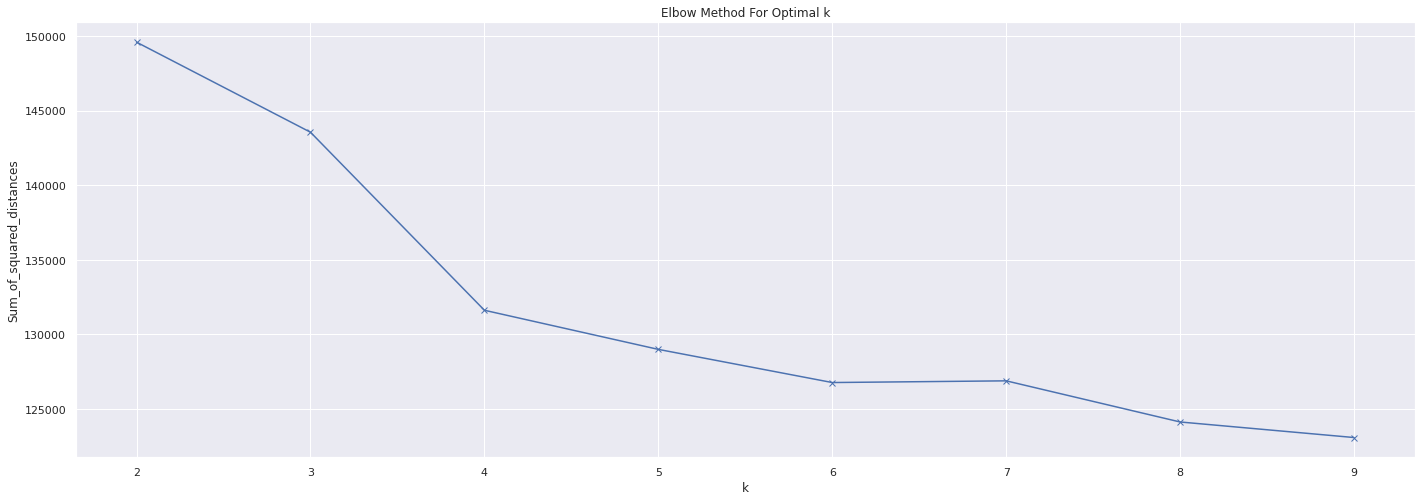

In [120]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,10) 

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Observation:
optimal_k values appears to be 4. 

In [121]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
ticket_cl=pd.DataFrame(list(zip(mydata['Combined Description Cleaned'],labels)),columns=['Combined Description Cleaned','cluster'])
print(ticket_cl.sort_values(by=['cluster']))

                           Combined Description Cleaned  cluster
4249                       distributor tool login issue        0
5474  able connect outlook get security alert certif...        0
5473  request stop delete job hi team basis tool sys...        0
5472           mobile device activation successfully do        0
5471  could find old year outlook receive hello till...        0
...                                                 ...      ...
2208  power outage fine company secondary circuit sh...        3
2206  network router since type outage x network cir...        3
5935  circuit outage since site primary circuit type...        3
1792  circuit since type outage network x power spec...        3
2272  circuit outage router site type network x circ...        3

[8500 rows x 2 columns]


Cluster: 0


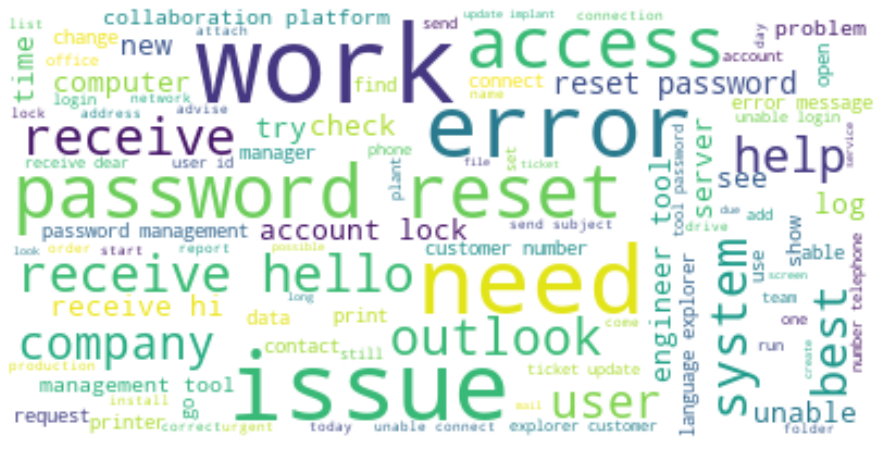

Cluster: 1


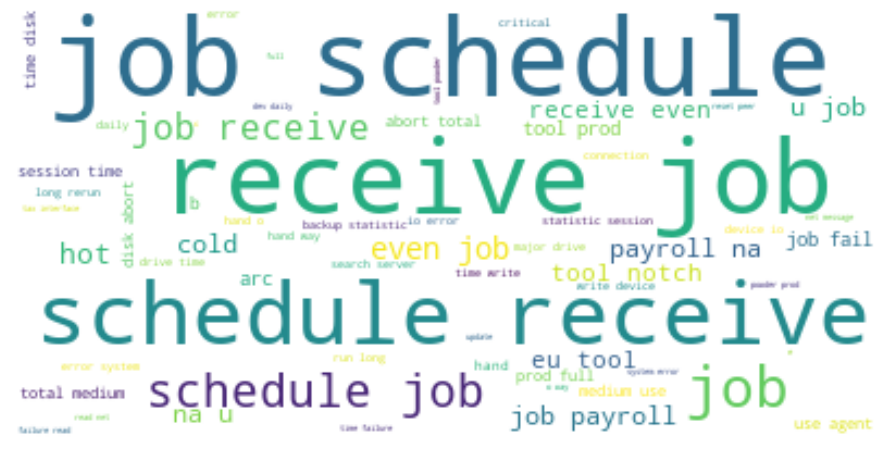

Cluster: 2


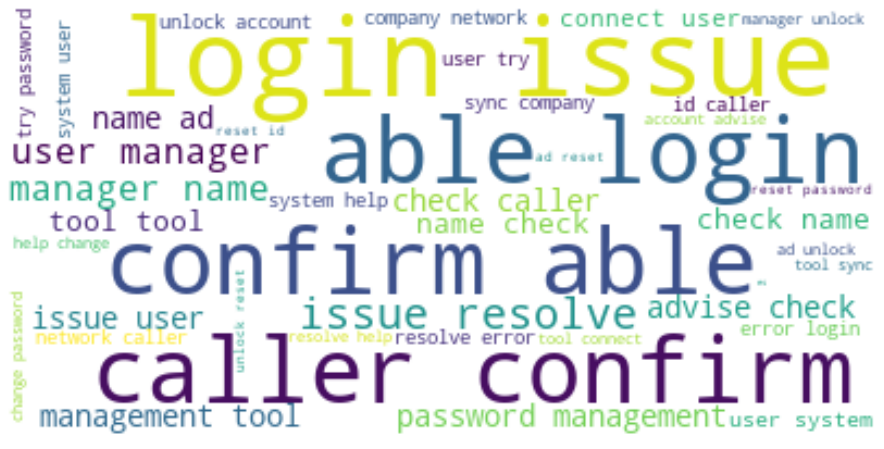

Cluster: 3


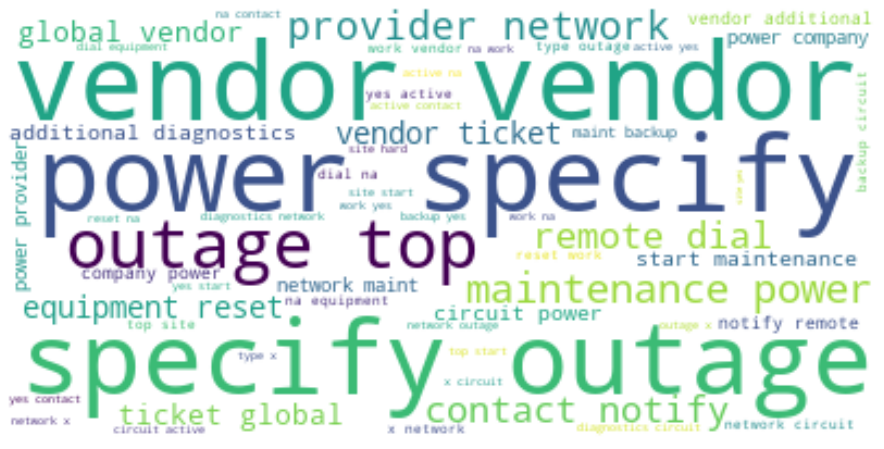

In [122]:
from wordcloud import WordCloud
result={'cluster':labels,'ticket':mydata['Combined Description Cleaned']}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['ticket'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   #print('Titles')
   titles=ticket_cl[ticket_cl.cluster==k]['Combined Description Cleaned']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

# Observation 
- Cluster:0 contains words like outlook, unable, etc
- Cluster: 1 contains words like vendor, outage, etc
- Cluster: 2 contains words related password management and reset
- Cluster: 3 contains words related to  jon schedule


# Topic Modeling (aka Tagging)
Topic modeling is an interesting problem in NLP applications where we want to get an idea of what topics we have in our dataset. A topic is nothing more than a collection of words that describe the overall theme. For example, in case of news articles, we might think of topics as politics, sports etc. but topic modeling won’t directly give you names of the topics but rather a set of most probable words that might describe a topic. It is up to us to determine what topic the set of words might refer to


In [123]:
# number of topics to extract
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(mydata['Combined Description Cleaned'])

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=123)
cls.fit(features)


NMF(n_components=5, random_state=123)

In [124]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 job schedule receive hot cold payroll na notch prod tool eu fail arc hand way 
1 password reset management tool request user manager unlock production change receive es need login id 
2 account lock unlock ad user lockout id check login issue hello frequent need team receive 
3 unable login outlook issue connect tool access user work error open engineer receive help log 
4 ticket update implant vendor power network outage circuit na yes work site global company active 


# Observation
In our dataset, we identified these words highlighted that seem to suggest the most important topics are 
- job schedule
- password resets
- account locks 
- login issues
- vendor issues.

In [125]:
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  \
False                      8500            8500                  8500   

       language  language name  Translated Short description  \
False      8500           8500                          8500   

       Translated Description  CombinedWordCount  \
False                    8500               8500   

       Combined Description Cleaned  CombinedWordCountCleaned  
False                          8500                      8500

### Milestone 1 - So far we have performed these steps

1. Exploring the given Data files
2. Understanding the structure of data
3. Missing points in data
4. Finding inconsistencies in the data
5. Visualizing different patterns
6. Visualizing different text features
7. Dealing with missing values
8. Text preprocessing
9. Creating word vocabulary from the corpus of report text data
10. Creating tokens as required

### Now we will run a quick model on how it performs in predicting the group with the data we have.
### Then we will explore different data augmentation techniques (in a different notebook)

In [126]:
mydata.isna().apply(pd.value_counts)

Short description  Description  Assignment group  \
False               8500         8500              8500   

       Raw Combined description  raw_word_count  Combined description  \
False                      8500            8500                  8500   

       language  language name  Translated Short description  \
False      8500           8500                          8500   

       Translated Description  CombinedWordCount  \
False                    8500               8500   

       Combined Description Cleaned  CombinedWordCountCleaned  
False                          8500                      8500

In [127]:
#mydata['Combined Description Cleaned'] = mydata['Combined Description Cleaned'].replace(np.nan, '', regex=True)

# We will now create the preprocessed dataset required for Machine Learning

In [128]:
mydata_ml = mydata[['Combined Description Cleaned', 'Assignment group']]
mydata_ml = mydata_dl.drop(mydata_dl.index[mydata_dl["Combined Description Cleaned"] == ''])
mydata_ml = mydata_dl.reset_index(drop=True)
mydata_ml.to_csv('datasets/input_data_after_preprocessing_for_ml.csv') 
mydata_ml.describe()

Combined Description Cleaned Assignment group
count                                       8500             8500
unique                                      6426               74
top     job job in job schedule at received from            GRP_0
freq                                         431             3976

In [129]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [Short description, Description, Assignment group, Raw Combined description, raw_word_count, Combined description, language, language name, Translated Short description, Translated Description, CombinedWordCount, Combined Description Cleaned, CombinedWordCountCleaned]
Index: []

In [130]:
##Reconfirmation
empty_space = mydata[mydata['Combined Description Cleaned'] == ""]
empty_space.describe()

raw_word_count  CombinedWordCount  CombinedWordCountCleaned
count       37.000000          37.000000                      37.0
mean         5.189189           1.270270                       1.0
std          1.897920           0.607758                       0.0
min          1.000000           1.000000                       1.0
25%          4.000000           1.000000                       1.0
50%          5.000000           1.000000                       1.0
75%          5.000000           1.000000                       1.0
max         11.000000           4.000000                       1.0

##### Label encode the target column

In [131]:
le = preprocessing.LabelEncoder()
mydata["LabelEncodings"] = le.fit_transform(mydata["Assignment group"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

74


In [132]:
y = np.asarray(mydata['LabelEncodings'])

In [133]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(mydata['Combined Description Cleaned'])
print(X_train_counts.shape)

(8500, 2937)


In [134]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(8500, 2937)


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.3)

In [136]:
print(len(count_vect.vocabulary_))

2937


In [137]:
print(X_train.shape)
print(y_train.shape)

(5950, 2937)
(5950,)


In [138]:
print(X_test.shape)
print(y_test.shape)

(2550, 2937)
(2550,)


In [139]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Logistic Regression Score: ", acc_score)
f_sc = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f_sc)

Logistic Regression Score:  0.6109803921568627
Logistic Regression F1 Score:  0.5819151264613546


In [140]:
##Reconfirmation
empty_space = mydata_dl[mydata_dl['Combined Description Cleaned'] == ""]
empty_space

Empty DataFrame
Columns: [Combined Description Cleaned, Assignment group]
Index: []

In [141]:
#parameters
max_features=10000
emb_dim=300
batch_size=1024
epochs=10

In [142]:
import pandas as pd
filename='datasets/pre_data_dl.csv'
data_dl=pd.read_csv(filename)
#pd.set_option('display.max_columns', None)
#print(data_dl.head())

In [143]:
X = (data_dl["Combined Description Cleaned"])
y= (data_dl['Assignment group'])
#categorical encoding y
y=pd.get_dummies(data_dl['Assignment group'])

In [144]:
#function for splitting the data
def split(X,y):
 X_train_spl,X_test_spl,y_train_spl,y_test_spl=train_test_split(X,y,test_size=0.2,random_state=123)
 return X_train_spl,X_test_spl,y_train_spl,y_test_spl
#split the data
X_train,X_test,y_train,y_test=split(X,y)


In [145]:
from tensorflow.keras.preprocessing.text import Tokenizer
#function for tokenizer
def dfTokenizer(df):
 tokenizer=Tokenizer(num_words=max_features,char_level=False)
 tokenizer.fit_on_texts(df)
 sequences=tokenizer.texts_to_sequences(df)
 return sequences,tokenizer
#tokenization
X,tokenizer = dfTokenizer(data_dl["Combined Description Cleaned"]) 
vocab_size=len(tokenizer.word_index)
print("vocabulary size is: ",vocab_size)

vocabulary size is:  3316


In [146]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#function for padding
def pad(x, length=None):
 if length is None:
   length=max([len(sentence)  for sentence in x])
 return pad_sequences(x,maxlen=length,padding='post')
 
 #padding 
X=pad_sequences(X,padding='post')
X.shape

(8481, 189)

In [147]:
word_index = tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
inp_len=X.shape[1]

In [148]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features,emb_dim,input_length=inp_len))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(74, activation='softmax'))
print(model.summary())
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 300)          3000000   
_________________________________________________________________
flatten (Flatten)            (None, 56700)             0         
_________________________________________________________________
dense (Dense)                (None, 74)                4195874   
Total params: 7,195,874
Trainable params: 7,195,874
Non-trainable params: 0
_________________________________________________________________
None


In [150]:
history=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test),verbose=1)


In [151]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 300)


In [152]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
#%reload_ext tensorboard
#%tensorboard --logdir=./logs_model_CNN --port=6008
#%tensorboard --logdir .


# We then uploaded the vecs.tsv & meta.tsv to https://projector.tensorflow.org/ and created the projector diagram for the Title page of the Interim Report